# Проект: Статистический анализ данных
# Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.
1. Пользователи — `users_go.csv`
    - *user_id*	уникальный идентификатор пользователя
    - *name*	имя пользователя
    - *age*	возраст
    - *city*	город
    - *subscription_type*	тип подписки (free, ultra)
2. Поездки — `rides_go.csv`
    - *user_id*	уникальный идентификатор пользователя
    - *distance*	расстояние, которое пользователь проехал в текущей сессии (в метрах)
    - *duration*	продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
    - *date*	дата совершения поездки
3. Подписки — `subscriptions_go.csv`
    - *subscription_type*	тип подписки
    - *minute_price*	стоимость одной минуты поездки по данной подписке
    - *start_ride_price*	стоимость начала поездки
    - *subscription_fee*	стоимость ежемесячного платежа
    
# План работы

1. Загрузка данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Объединение данных
5. Подсчёт выручки
6. Проверка гипотез
7. Распределения

#### Шаг 1. Загрузка данных

In [1]:
import numpy as np
import pandas as pd
from scipy import stats as st
from scipy.stats import binom
import matplotlib.pyplot as plt

In [2]:
try:
    df_users = pd.read_csv('./users_go.csv')
    df_rides = pd.read_csv('./rides_go.csv')
    df_subsc = pd.read_csv('./subscriptions_go.csv')
except:
    df_users = pd.read_csv('/datasets/users_go.csv')
    df_rides = pd.read_csv('/datasets/rides_go.csv')
    df_subsc = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
print("Информация о пользователях:")
display(df_users.info())
print("\nПервые строки таблицы users_go:")
display(df_users.head())

Информация о пользователях:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None


Первые строки таблицы users_go:


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [4]:
print("\nИнформация о поездках:")
display(df_rides.info())
print("\nПервые строки таблицы rides_go:")
display(df_rides.head())


Информация о поездках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None


Первые строки таблицы rides_go:


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


In [5]:
print("\nИнформация о подписках:")
display(df_subsc.info())
print("\nПервые строки таблицы subscriptions_go:")
display(df_subsc.head())


Информация о подписках:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None


Первые строки таблицы subscriptions_go:


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


***Вывод:***

В данных:

- `users_go` 1565 записи, пропуски отсутствуют.
- `rides_go` 18068 записи, пропуски отсутствуют.
- `subscriptions_go 2` записи, пропуски отсутствуют..

#### Шаг 2. Предобработка данных

***2.1 Приведите столбец date к типу даты pandas. 2.2 Создайте новый столбец с номером месяца на основе столбца date.***

In [6]:
df_rides['date'] = pd.to_datetime(df_rides['date'], format='%Y-%m-%d')

df_rides['month'] = df_rides['date'].dt.month

In [7]:
df_rides['duration'] = np.ceil(df_rides['duration']) 

In [8]:
print('Записи с', df_rides['date'].min(), 'по', df_rides['date'].max())
display(df_rides.head())

Записи с 2021-01-01 00:00:00 по 2021-12-30 00:00:00


,user_id,distance,duration,date,month
0,1,4409.919140,26.0,2021-01-01,1
1,1,2617.592153,16.0,2021-01-18,1
2,1,754.159807,7.0,2021-04-20,4
3,1,2694.783254,19.0,2021-08-11,8
4,1,4028.687306,27.0,2021-08-28,8


***2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.***

In [9]:
print("Пропущенные значения в df_users:")
df_users.isna().sum()

Пропущенные значения в df_users:


user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [10]:
print("Количество явных дубликатов в df_users:")
df_users.duplicated().sum()

Количество явных дубликатов в df_users:


31

In [11]:
df_users = df_users.drop_duplicates()
print("Количество явных дубликатов после удаления:", df_users.duplicated().sum())

Количество явных дубликатов после удаления: 0


In [12]:
print("Пропущенные значения в df_rides:")
df_rides.isna().sum()

Пропущенные значения в df_rides:


user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [13]:
print("Количество явных дубликатов в df_rides:", df_rides.duplicated().sum())

Количество явных дубликатов в df_rides: 0


In [14]:
print("Пропущенные значения в df_subsc:")
df_subsc.isna().sum()

Пропущенные значения в df_subsc:


subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [15]:
print("Количество явных дубликатов в df_subsc:", df_subsc.duplicated().sum())

Количество явных дубликатов в df_subsc: 0


***Вывод:***

В данных:

- `users_go` 1565 записи, пропуски отсутствуют, количество явных дубликатов 31.
- `rides_go` 18068 записи, пропуски отсутствуют, явных дубликатов нет.
- `subscriptions_go 2` записи, пропуски отсутствуют, явных дубликатов нет. Названия столбцов в норме. 

***Вывод:***

- **`users_go`** - удалили **31** дубликат из датафрейма.
- **`rides_go`** -  предобработали такие столбцы как: 
     - `distance` - округлили до двух значений после запятой, 
     - `duration` - округлили в большую сторону в соответствии с пунктом 5.2 для дальнейших операций с ними, 
     - `date` - привели столбец к типу datetime64.
- **`rides_go`** - добавили столбец `month`
- **`subscriptions_go 2`** - без изменений.

#### Шаг 3. Исследовательский анализ данных

##### частота встречаемости городов;

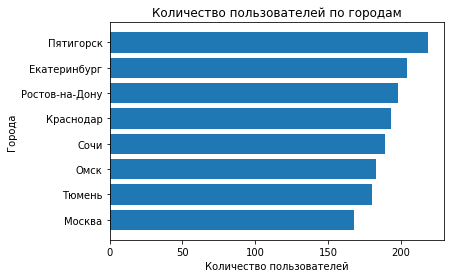

In [16]:
users_1 = df_users.groupby('city')['user_id'].count().sort_values(ascending = True).reset_index()

plt.barh(users_1['city'], users_1['user_id'])
plt.title('Количество пользователей по городам')
plt.xlabel('Количество пользователей')
plt.ylabel('Города')
plt.show()

***Вывод:***

Лидером по количеству пользователей является город Пятигорск, где зарегистрировано более 200 пользователей. Это говорит о том, что сервис особенно популярен в этом городе.

За Пятигорском следуют такие города, как Екатеринбург, Ростов-на-Дону и Краснодар, также с высокой долей пользователей.

Наименее активно сервисом пользуются жители городов Тюмень и Омск, которые занимают нижние позиции на графике.

Москва, несмотря на свой статус крупнейшего города, имеет относительно небольшое количество пользователей по сравнению с лидирующими городами.

##### соотношение пользователей с подпиской и без подписки;

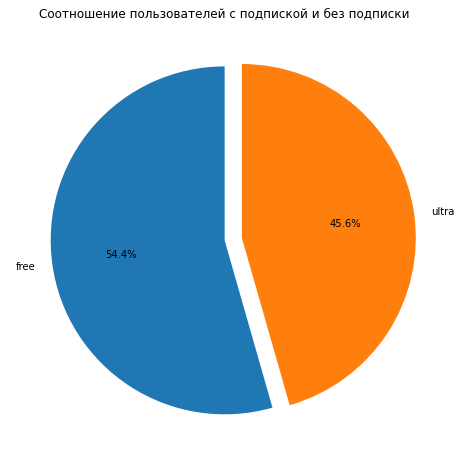

In [17]:
subscription_counts = df_users['subscription_type'].value_counts()

subscription_counts.plot.pie(autopct='%1.1f%%', figsize=(8, 8), startangle=90, explode=[0, 0.1])
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.ylabel('')
plt.show()

***Вывод:***

- Пользователи без подписки составляют 54.4% от общего числа пользователей. 

- Пользователи с подпиской Ultra составляют 45.6%. 

##### возраст пользователей;

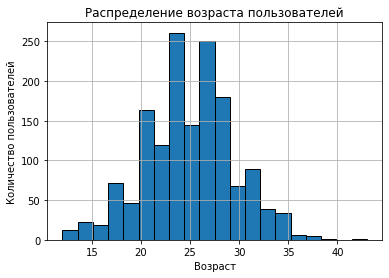

In [18]:
plt.hist(df_users['age'], bins=20, edgecolor='black')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.grid(True)
plt.show()

In [19]:
average_age = df_users['age'].mean()
print(f'Средний возраст пользователей: {average_age:.2f} лет')

Средний возраст пользователей: 24.90 лет


***Вывод:***

Графическое отображение количества пользователей в зависимости от их возраста демонстрирует, что средний возраст потребителя услуги подчиняется закону нормального распределения, при этом медиана распределения приходится примерно на `25 лет`. Примечательно, что `средний возраст` и `медиана` в данном случае практически совпадают.

#####  расстояние, которое пользователь преодолел за одну поездку;

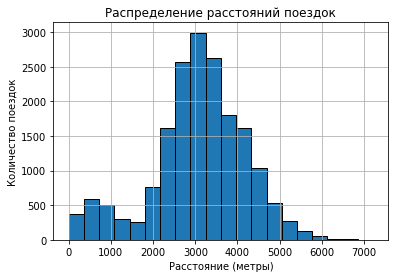

In [20]:
plt.hist(df_rides['distance'], bins=20, edgecolor='black')
plt.title('Распределение расстояний поездок')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

In [21]:
min_distance = df_rides['distance'].min()
max_distance = df_rides['distance'].max()
mean_distance = df_rides['distance'].mean()
median_distance = df_rides['distance'].median()

print(f'Минимальное расстояние: {min_distance} метров')
print(f'Максимальное расстояние: {max_distance} метров')
print(f'Среднее расстояние: {mean_distance:.2f} метров')
print(f'Медиана расстояний: {median_distance:.2f} метров')

Минимальное расстояние: 0.855682925681208 метров
Максимальное расстояние: 7211.007744598519 метров
Среднее расстояние: 3070.66 метров
Медиана расстояний: 3133.61 метров


***Вывод***

Хвост в диапазоне от 0 до 1000 метров на гистограмме.
Это могут быть реальные поездки на очень короткие расстояния, например, когда пользователь взял самокат для перемещения до ближайшего магазина.

Большинство поездок укладываются в диапазон `3000–4000` метров, что может говорить о стандартных сценариях использования самокатов для поездок по городу. Однако встречаются и более короткие или длинные поездки, что говорит о разнообразии использования сервиса. Среднее и медианное расстояния близки по значению, что подтверждает симметричное распределение данных.

***3.5 Продолжительность поездок***

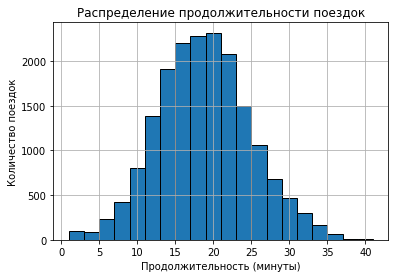

In [22]:
plt.hist(df_rides['duration'], bins=20, edgecolor='black')
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

In [23]:
min_duration = df_rides['duration'].min()
max_duration = df_rides['duration'].max()
mean_duration = df_rides['duration'].mean()
median_duration = df_rides['duration'].median()

print(f'Минимальная продолжительность поездки: {min_duration} минут')
print(f'Максимальная продолжительность поездки: {max_duration} минут')
print(f'Средняя продолжительность поездки: {mean_duration:.2f} минут')
print(f'Медиана продолжительности поездки: {median_duration:.2f} минут')

Минимальная продолжительность поездки: 1.0 минут
Максимальная продолжительность поездки: 41.0 минут
Средняя продолжительность поездки: 18.30 минут
Медиана продолжительности поездки: 18.00 минут


***Вывод***

- Большинство поездок длится от 15 до 20 минут, что видно по пику на графике.

- Минимальная продолжительность поездки — 1 минута, а максимальная — 41 минута. Это означает, что есть как очень короткие, так и более длительные поездки.

- Средняя продолжительность поездки составляет около 18.3 минут, а медиана (центральное значение) — 18 минут. Это значит, что большинство поездок длится примерно 18 минут.

Таким образом, средняя поездка длится примерно 18 минут, что вполне соответствует времени, которое люди могут тратить на короткие поездки по городу.

#### Шаг 4. Объединение данных

***4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge().***

In [24]:
user_rides = pd.merge(df_users, df_rides, on='user_id', how='inner')

full_data = pd.merge(user_rides, df_subsc, on='subscription_type', how='left')

display(full_data.head())

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


***4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:***
- c данными о пользователях без подписки;
- с данными о пользователях с подпиской.

In [25]:
non_subscribers = full_data[full_data['subscription_type'] == 'free']

In [26]:
subscribers = full_data[full_data['subscription_type'] == 'ultra']

In [27]:
print("Пользователи без подписки:")
display(non_subscribers.head())

Пользователи без подписки:


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,18.0,2021-02-14,2,8,50,0


In [28]:
print("Пользователи с подпиской:")
display(subscribers.head())

Пользователи с подпиской:


,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,27.0,2021-08-28,8,6,0,199


***4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.***

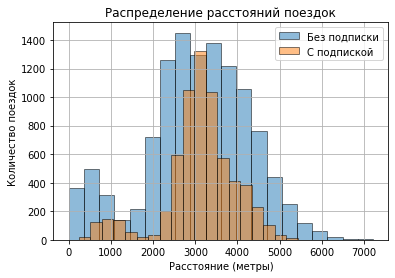

In [29]:
plt.hist(non_subscribers['distance'], bins=20, alpha=0.5, label='Без подписки', edgecolor='black')

plt.hist(subscribers['distance'], bins=20, alpha=0.5, label='С подпиской', edgecolor='black')

plt.title('Распределение расстояний поездок')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Количество поездок')
plt.legend()
plt.grid(True)
plt.show()

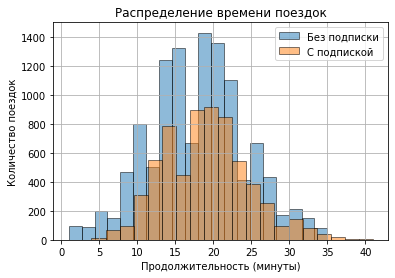

In [30]:
plt.hist(non_subscribers['duration'], bins=20, alpha=0.5, label='Без подписки', edgecolor='black')

plt.hist(subscribers['duration'], bins=20, alpha=0.5, label='С подпиской', edgecolor='black')

plt.title('Распределение времени поездок')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Количество поездок')
plt.legend()
plt.grid(True)
plt.show()

***Вывод***

Мы объединили данные о пользователях, поездках и подписках в один датафрейм.
Разделили пользователей на две группы: с подпиской и без.
Построили графики для анализа расстояний и времени поездок для обеих групп. Эти визуализации помогут сравнить поведение пользователей с подпиской и без.

#### Шаг 5. Подсчёт выручки

***5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.***

In [31]:
data = full_data.groupby(['user_id', 'month', 'subscription_type'], as_index=False).agg({
    'distance': 'sum',
    'duration': 'sum',
    'user_id': 'count'
}).rename(columns={'user_id': 'trip_count'})

# Присоединяем таблицу с тарифами для подписки
data = data.merge(df_subsc[['subscription_type', 'minute_price', 'start_ride_price', 'subscription_fee']], 
                  on='subscription_type', how='left')

display(data.head())

,month,subscription_type,distance,duration,trip_count,minute_price,start_ride_price,subscription_fee
0,1,ultra,7027.511294,42.0,2,6,0,199
1,4,ultra,754.159807,7.0,1,6,0,199
2,8,ultra,6723.470560,46.0,2,6,0,199
3,10,ultra,5809.911100,32.0,2,6,0,199
4,11,ultra,7003.499363,56.0,3,6,0,199


Добавл информацию о стоимости минуты, старте поездки и абонентской плате из таблицы подписок сразу на этом этапе, чтобы она была доступна в следующем шаге

***5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.***

In [32]:
data['revenue'] = (data['duration'] * data['minute_price']) + (data['trip_count'] * data['start_ride_price']) + data['subscription_fee'].fillna(0)

display(data.head())

,month,subscription_type,distance,duration,trip_count,minute_price,start_ride_price,subscription_fee,revenue
0,1,ultra,7027.511294,42.0,2,6,0,199,451.0
1,4,ultra,754.159807,7.0,1,6,0,199,241.0
2,8,ultra,6723.470560,46.0,2,6,0,199,475.0
3,10,ultra,5809.911100,32.0,2,6,0,199,391.0
4,11,ultra,7003.499363,56.0,3,6,0,199,535.0


In [33]:
data['revenue'].sum()

3878641.0

***Вывод***

1. Агрегирование данных:

    - Мы создали агрегированный датафрейм, который содержит информацию по каждому пользователю за каждый месяц. Включены данные о суммарном расстоянии, количестве поездок и суммарном времени поездок (в минутах).
    - Например, в строках видно, что в первом месяце пользователь с подпиской проехал 7027.51 метров за 42 минуты и совершил 2 поездки.


2. Расчёт выручки:

    - Умножаем продолжительность поездок `duration` на стоимость минуты `minute_price`.
    - Добавляем количество поездок `trip_count`, умноженное на стоимость старта поездки `start_ride_price`.
    - Добавляем абонентскую плату `subscription_fee`.
    - Используем fillna(0) для пользователей без подписки, так как у них нет ежемесячной платы за нее. И чтобы корректно посичтать ее, заменяем их на 0.


3. Общая выручка:

    - Суммарная выручка по всем пользователям и месяцам составляет 3878641 рубль, что отражает общий доход, который сервис GoFast получил за выбранный период от пользователей с подпиской.

#### Шаг 6. Проверка гипотез

***6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.***

Гипотезы:
- Нулевая гипотеза: Среднее время поездок пользователей с подпиской и без подписки одинаково.
- Альтернативная гипотеза: Пользователи с подпиской тратят больше времени на поездки.

In [34]:
ultra_duration = subscribers['duration']
free_duration = non_subscribers['duration']

t_stat, p_value = st.ttest_ind(ultra_duration, free_duration, equal_var=False)

print(f"T-statistic: {t_stat:.6f}")
print(f"P-value: {p_value}") # В этой строке не стал применять форматирование строк из-за очень маленького значения

if p_value < 0.05:
    print("Нулевая гипотеза отклонена: пользователи с подпиской тратят больше времени на поездки.")
else:
    print("Нулевая гипотеза не отклонена: пользователи с подпиской не тратят больше времени на поездки.")

T-statistic: 12.624855
P-value: 2.3629358507402705e-36
Нулевая гипотеза отклонена: пользователи с подпиской тратят больше времени на поездки.


***Вывод:***

Пользователи с подпиской действительно тратят больше времени на поездки по сравнению с пользователями без подписки. Это делает их более "выгодными" для компании, так как они проводят больше времени, используя сервис.

***6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.***

Гипотезы:

- Нулевая гипотеза: Среднее расстояние пользователей с подпиской меньше или равно 3130 метров.
- Альтернативная гипотеза: Среднее расстояние пользователей с подпиской превышает 3130 метров.

In [35]:
ultra_distance = subscribers['distance']

t_stat, p_value = st.ttest_1samp(ultra_distance, 3130, alternative='greater')

print(f"T-statistic: {t_stat:.6f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print("Нулевая гипотеза отклонена: среднее расстояние пользователей с подпиской превышает 3130 метров.")
else:
    print("Нулевая гипотеза не отклонена: среднее расстояние пользователей с подпиской не превышает 3130 метров.")

T-statistic: -1.402123
P-value: 0.919537
Нулевая гипотеза не отклонена: среднее расстояние пользователей с подпиской не превышает 3130 метров.


***Вывод:***

На основании полученных данных можно сделать вывод, что среднее расстояние поездки пользователей с подпиской не превышает оптимального значения в 3130 метров. Следовательно, с точки зрения износа самокатов, пользователи с подпиской проезжают расстояния, которые укладываются в допустимые пределы.

***6.3 Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.***

Гипотезы:

- Нулевая гипотеза: Средняя помесячная выручка от пользователей с подпиской не выше выручки от пользователей без подписки.
- Альтернативная гипотеза: Средняя помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

In [36]:
ultra_revenue = data[data['subscription_type'] == 'ultra']['revenue']
free_revenue = data[data['subscription_type'] == 'free']['revenue']

t_stat, p_value = st.ttest_ind(ultra_revenue, free_revenue, equal_var=False, alternative='greater')

print(f"T-statistic: {t_stat:.6f}")
print(f"P-value: {p_value:}") # В этой строке не стал применять форматирование строк из-за очень маленького значения

if p_value < 0.05:
    print("Нулевая гипотеза отклонена: помесячная выручка от пользователей с подпиской выше.")
else:
    print("Нулевая гипотеза не отклонена: помесячная выручка от пользователей с подпиской не выше.")

T-statistic: 13.201755
P-value: 8.874140893976874e-40
Нулевая гипотеза отклонена: помесячная выручка от пользователей с подпиской выше.


***Вывод:***

Помесячная выручка от пользователей с подпиской действительно выше, чем выручка от пользователей без подписки. Этот результат может указывать на выгоду для компании от пользователей, которые оформляют подписку, поскольку они приносят больше дохода за месяц.

***6.4 Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?***

Гипотезы:

- Нулевая гипотеза: Количество обращений в техподдержку после обновления серверов не изменилось или увеличилось.
- Альтернативная гипотеза: Количество обращений в техподдержку снизилось после обновления серверов.

Некоторый файл содержит данные о количестве обращений в техподдержку для каждого пользователя до обновления серверов и после обновления. Это парные наблюдения, так как для каждого пользователя есть две величины (до и после обновления).
Поскольку мы сравниваем два связанных набора данных (до и после для одного и того же пользователя), используем парный t-тест (`stats.ttest_rel(alternative='greater')`).
Мы используем параметр `alternative='greater'`, поскольку предполагаем, что количество обращений снизилось после обновления.

***Общий вывод по проекту***

***Шаг 1. Загрузка данных***: 

На первом шаге были загружены данные о пользователях, их поездках и подписках, а также информация о стоимости подписки. Данные были успешно считаны, и их структура проанализирована. Пропуски и дубликаты были обработаны. Это позволило подготовить данные для дальнейшей работы и анализа.

***Шаг 2. Предобработка данных***: 

На этом шаге данные были предобработаны для удобства работы:

- Привели столбец с датой поездки к нужному формату.
- Создали новый столбец с номером месяца на основе даты поездки.
- Округлили продолжительность поездок и расстояния для корректного подсчёта выручки. После обработки данные были очищены от дубликатов, что улучшило их качество.

***Шаг 3. Исследовательский анализ данных:***

Мы провели исследовательский анализ данных для понимания распределения пользователей и их поведения:

- Проанализировали частоту городов: больше всего пользователей сервиса находится в Пятигорске, затем следуют Екатеринбург и Ростов-на-Дону.
- Проанализировали соотношение пользователей с подпиской и без подписки: большинство пользователей используют сервис без подписки (54.4%), но доля пользователей с подпиской (45.6%) также значительна.
- Исследовали распределение возрастов: большинство пользователей — молодёжь в возрасте от 20 до 30 лет.
- Проанализировали расстояния и продолжительность поездок: среднее расстояние и время поездок варьируется, но большинство поездок укладывается в стандартные диапазоны, что помогает понять типичное использование сервиса.

***Шаг 4. Объединение данных***: 

Мы объединили данные о пользователях, поездках и подписках для дальнейшего анализа. Затем разделили пользователей на две группы: с подпиской и без, чтобы изучить поведение каждой категории пользователей. Это позволило построить визуализации для сравнения расстояний и продолжительности поездок.

***Шаг 5. Подсчёт выручки***: 

На этом шаге мы рассчитали выручку для каждого пользователя в зависимости от типа подписки. Пользователи с подпиской платят за поездки по льготным тарифам, а пользователи без подписки — по стандартным более высоким тарифам. 

Результаты показали:

- Пользователи с подпиской приносят более стабильную выручку за счёт ежемесячной абонентской платы.
- Выручка от пользователей без подписки зависит от частоты поездок и продолжительности поездок, что может приводить к более высоким доходам при частом использовании сервиса.

***Шаг 6. Проверка гипотез***: 

Мы проверили несколько ключевых гипотез:

- Продолжительность поездок: Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки. Это делает их более выгодными для компании.
- Среднее расстояние поездок: Среднее расстояние, которое проезжают пользователи с подпиской, не превышает 3130 метров, что означает, что они используют самокаты в пределах допустимого износа.
- Помесячная выручка: Помесячная выручка от пользователей с подпиской значимо выше, чем выручка от пользователей без подписки. Это указывает на выгоду от подписочной модели.
- Снижение количества обращений в техподдержку: Для проверки гипотезы о снижении количества обращений в техподдержку после обновления серверов был предложен парный t-тест(`stats.ttest_rel(alternative='greater')`).


***Проведённый анализ показал, что***:

1. Подписка делает пользователей более лояльными и активными, увеличивая время поездок и выручку.
2. С точки зрения износа самокатов, подписчики используют сервис в пределах допустимых норм.
3. Подписочная модель выгодна для компании, поскольку приносит большую и стабильную выручку по сравнению с пользователями, которые оплачивают поездки без подписки.